# Price Prediction of ICICI Stock

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/icici bank data.csv")

In [ ]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,13-Nov-2023,EQ,940.90,940.90,932.0,942.35,934.10,934.45,934.34,"1,008.70",796.0,"1,14,70,096","10,71,70,18,281.95","2,49,856"
1,12-Nov-2023,EQ,942.00,943.20,939.6,938.60,942.15,942.35,941.88,"1,008.70",796.0,"15,61,479","1,47,07,22,401.40","34,082"
2,10-Nov-2023,EQ,934.90,941.45,932.4,937.35,940.50,938.60,937.49,"1,008.70",796.0,"95,60,455","8,96,28,08,080.00","1,60,920"
3,09-Nov-2023,EQ,934.00,942.35,933.0,935.75,936.50,937.35,938.01,"1,008.70",796.0,"94,06,117","8,82,30,05,431.45","2,07,920"
4,08-Nov-2023,EQ,948.45,948.45,934.1,948.10,935.70,935.75,936.99,"1,008.70",796.0,"1,76,06,074","16,49,67,34,862.35","4,41,034"


In [ ]:
df.isna().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

In [ ]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

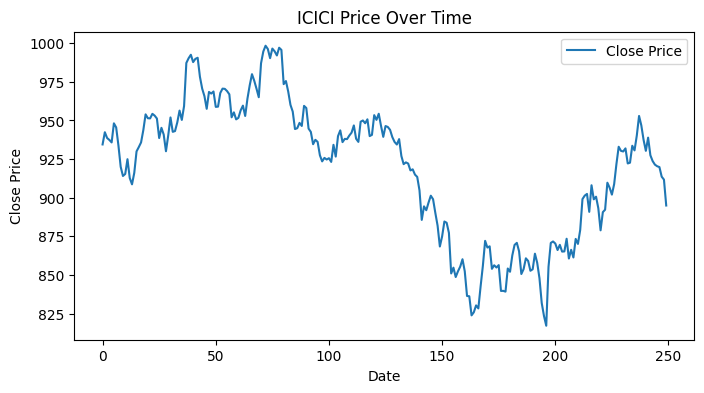

In [ ]:
target = 'close '
stock_name = "ICICI"
plt.figure(figsize=(8, 4))
plt.plot(df[target], label='Close Price')
plt.title( stock_name +' Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

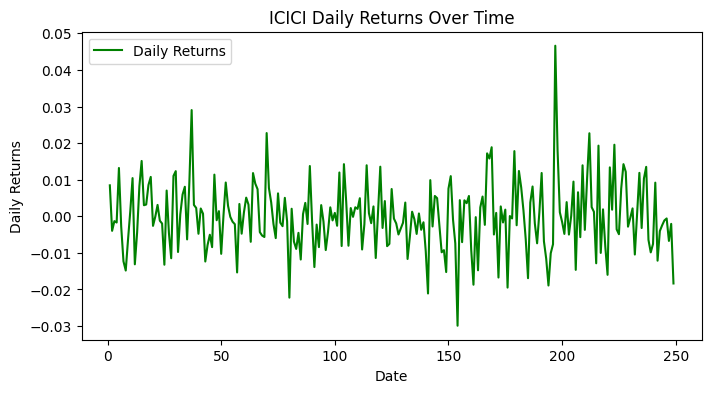

In [ ]:
daily_returns = df[target].pct_change()
plt.figure(figsize=(8, 4))
plt.plot(daily_returns, label='Daily Returns', color='green')
plt.title(stock_name+ ' Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

In [ ]:
print("Summary Statistics:")
print(df[target].describe())

Summary Statistics:
count    250.00000
mean     919.53380
std       44.00584
min      817.20000
25%      882.37500
50%      930.45000
75%      950.57500
max      998.30000
Name: close , dtype: float64


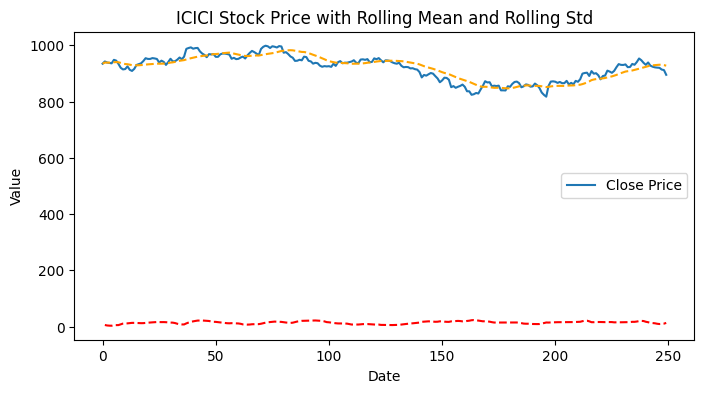

In [ ]:
window = 20
df['Rolling Mean'] = df[target].rolling(window=window,min_periods=1).mean()
df['Rolling Std'] = df[target].rolling(window=window,min_periods=1).std()

plt.figure(figsize=(8, 4))
plt.plot(df[target], label='Close Price')
plt.plot(df['Rolling Mean'],  linestyle='--', color='orange')
plt.plot(df['Rolling Std'], linestyle='--', color='red')
plt.title(stock_name + ' Stock Price with Rolling Mean and Rolling Std')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

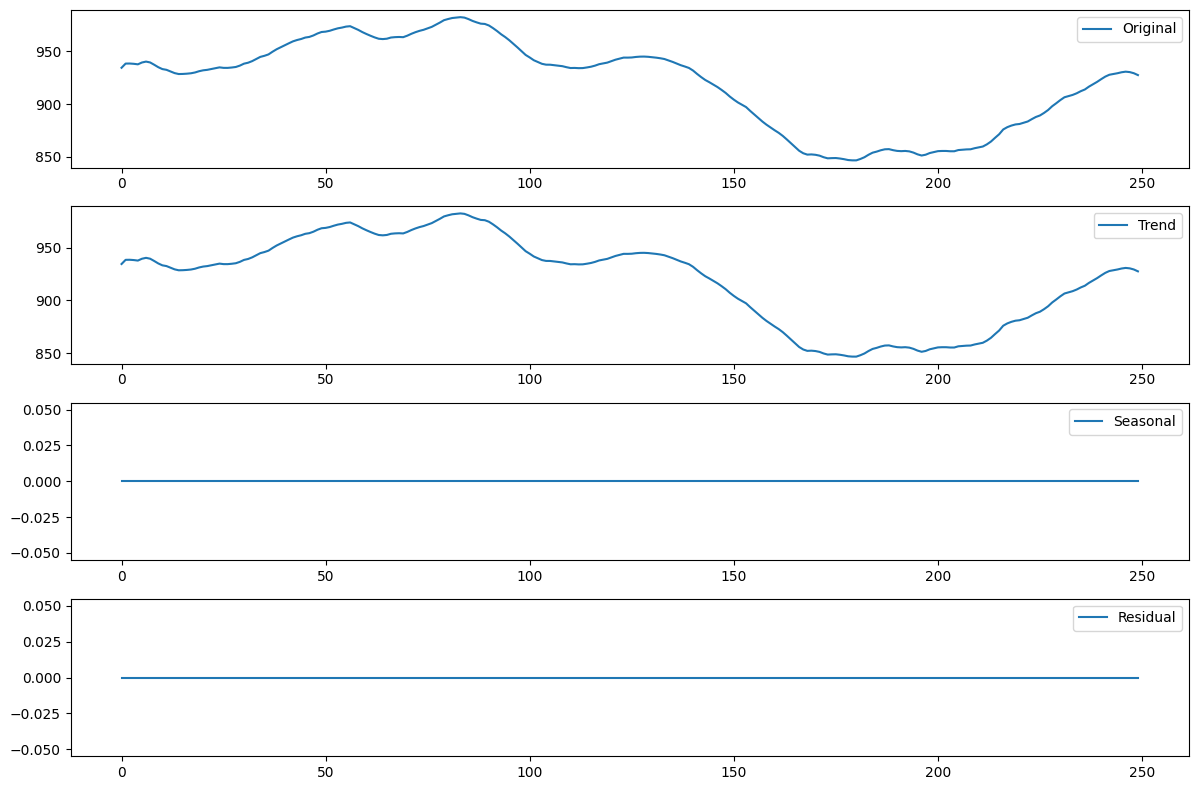

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Rolling Mean"], model='additive', period=1)
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index,df["Rolling Mean"], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

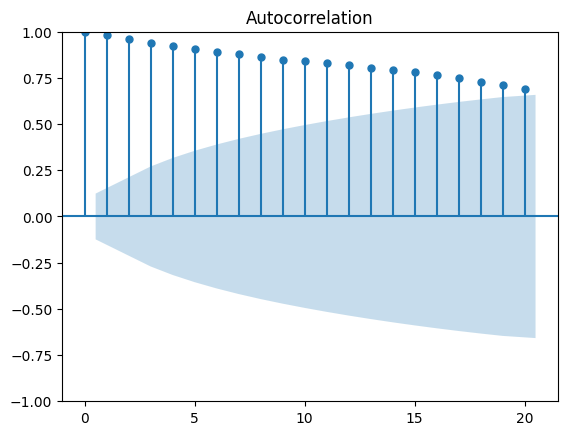

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
lag = 20
acf = plot_acf(df[target],lags = lag)

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df[target],autolag='AIC')
print("ADF: ", dftest[0])
print("P-Value: ", dftest[1])
print("Num Of Lags: ", dftest[2])
print("Num of observation used for ADF Regression and Critical Values Calculation: ", dftest[3])
print("Critical Value")
for key,val in dftest[4].items():
    print("\t",key,": ",val)

ADF:  -1.4931493078604567
P-Value:  0.5368975152340314
Num Of Lags:  0
Num of observation used for ADF Regression and Critical Values Calculation:  249
Critical Value
	 1% :  -3.4568881317725864
	 5% :  -2.8732185133016057
	 10% :  -2.5729936189738876


In [ ]:
df.set_index("Date ", inplace=True)
data = df[target]

In [ ]:
data = pd.DataFrame(data,columns=['close '])
data.head()

,close
Date,
13-Nov-2023,934.45
12-Nov-2023,942.35
10-Nov-2023,938.60
09-Nov-2023,937.35
08-Nov-2023,935.75


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
length = data.size
timestamp = 20
percent_data = 0.85

In [ ]:
data

,close
Date,
13-Nov-2023,934.45
12-Nov-2023,942.35
10-Nov-2023,938.60
09-Nov-2023,937.35
08-Nov-2023,935.75
...,...
18-Nov-2022,920.35
17-Nov-2022,919.80
16-Nov-2022,913.60


In [ ]:
from math import ceil
train = data.iloc[:ceil(length*percent_data),0]
test = data.iloc[ceil(length*percent_data)-timestamp:,0]

In [ ]:
train = pd.DataFrame(train,columns=['close '])
test = pd.DataFrame(test,columns=['close '])

In [ ]:
train.head()

,close
Date,
13-Nov-2023,934.45
12-Nov-2023,942.35
10-Nov-2023,938.60
09-Nov-2023,937.35
08-Nov-2023,935.75


In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train

array([[0.64743236],
       [0.69105467],
       [0.67034787],
       [0.66344561],
       [0.65461071],
       [0.72280508],
       [0.70817228],
       [0.64384318],
       [0.5673661 ],
       [0.53478741],
       [0.54196576],
       [0.59469906],
       [0.52760906],
       [0.50496963],
       [0.54610712],
       [0.62258421],
       [0.63804528],
       [0.65461071],
       [0.6987852 ],
       [0.75483158],
       [0.74102706],
       [0.74047488],
       [0.75676422],
       [0.75041414],
       [0.73992269],
       [0.67034787],
       [0.70679183],
       [0.68277195],
       [0.62313639],
       [0.67973495],
       [0.74378796],
       [0.69243512],
       [0.69519602],
       [0.72611817],
       [0.76836002],
       [0.73495306],
       [0.78464936],
       [0.93843181],
       [0.95527333],
       [0.9676974 ],
       [0.9414688 ],
       [0.95306461],
       [0.95692987],
       [0.88928769],
       [0.84676974],
       [0.81971287],
       [0.7747101 ],
       [0.834

In [ ]:
train_length = scaled_train.size
val_percent = 0.10
train_data = scaled_train[:ceil(train_length*(1-val_percent))]
val_data = scaled_train[ceil(train_length*(1-val_percent))-timestamp:]
train_length

213

In [ ]:
def GenerateTimeSeries(dataset, timestamp, dataset_length):
  X = []
  Y = []
  for i in range(timestamp, dataset_length):
    X.append(dataset[i-timestamp:i,0])
    Y.append(dataset[i,0])
  X,Y = np.array(X),np.array(Y)

  return X,Y


In [ ]:
train_data.shape[0]

192

In [ ]:
timestamp = 20
X_train,Y_train = GenerateTimeSeries(train_data,timestamp, train_data.shape[0])

X_test,Y_test = GenerateTimeSeries(scaled_test, timestamp, scaled_test.shape[0])

In [ ]:
X_val, Y_val = GenerateTimeSeries(val_data, timestamp, val_data.shape[0])

In [ ]:
X_train,Y_train

(array([[0.64743236, 0.69105467, 0.67034787, ..., 0.65461071, 0.6987852 ,
         0.75483158],
        [0.69105467, 0.67034787, 0.66344561, ..., 0.6987852 , 0.75483158,
         0.74102706],
        [0.67034787, 0.66344561, 0.65461071, ..., 0.75483158, 0.74102706,
         0.74047488],
        ...,
        [0.30314743, 0.27912755, 0.283545  , ..., 0.20237438, 0.24075097,
         0.23136389],
        [0.27912755, 0.283545  , 0.20320265, ..., 0.24075097, 0.23136389,
         0.19630039],
        [0.283545  , 0.20320265, 0.21590282, ..., 0.23136389, 0.19630039,
         0.20154611]]),
 array([0.74102706, 0.74047488, 0.75676422, 0.75041414, 0.73992269,
        0.67034787, 0.70679183, 0.68277195, 0.62313639, 0.67973495,
        0.74378796, 0.69243512, 0.69519602, 0.72611817, 0.76836002,
        0.73495306, 0.78464936, 0.93843181, 0.95527333, 0.9676974 ,
        0.9414688 , 0.95306461, 0.95692987, 0.88928769, 0.84676974,
        0.81971287, 0.7747101 , 0.83489785, 0.82909994, 0.83655439,
 

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM,Dropout,GRU, Input

In [ ]:
def lstm_model(input_shape):
  regressor = Sequential()
  regressor.add(LSTM(units=100,return_sequences=True, input_shape = input_shape))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(units=1))

  noise = Input(shape = input_shape)
  output = regressor(noise)

  regressor.summary()
  return Model(noise,output)

def gru_model(input_shape):
  regressor = Sequential()
  regressor.add(GRU(units=100, return_sequences=True, input_shape = input_shape))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(units=1))

  noise = Input(shape = input_shape)
  output = regressor(noise)
  regressor.summary()
  return Model(noise,output)

In [ ]:
feature = 1
input_shape = (timestamp,feature)
lstm = lstm_model(input_shape)
gru = gru_model(input_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 20, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 20, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 20, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 20, 100)           8

In [ ]:
lstm.compile(optimizer='adam', loss='mse')
gru.compile(optimizer='adam', loss='mse')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=6,
    verbose=1,
    mode='min'
)

In [ ]:
lstm.fit(X_train, Y_train, validation_data= (X_val,Y_val), epochs=150, batch_size=32)

Epoch 1/150
6/6 [==============================] - 13s 695ms/step - loss: 0.2171 - val_loss: 0.0248
Epoch 2/150
6/6 [==============================] - 1s 87ms/step - loss: 0.0509 - val_loss: 0.0175
Epoch 3/150
6/6 [==============================] - 1s 86ms/step - loss: 0.0334 - val_loss: 0.0240
Epoch 4/150
6/6 [==============================] - 1s 140ms/step - loss: 0.0357 - val_loss: 0.0160
Epoch 5/150
6/6 [==============================] - 1s 136ms/step - loss: 0.0307 - val_loss: 0.0155
Epoch 6/150
6/6 [==============================] - 1s 139ms/step - loss: 0.0249 - val_loss: 0.0109
Epoch 7/150
6/6 [==============================] - 1s 136ms/step - loss: 0.0248 - val_loss: 0.0107
Epoch 8/150
6/6 [==============================] - 1s 122ms/step - loss: 0.0232 - val_loss: 0.0143
Epoch 9/150
6/6 [==============================] - 1s 88ms/step - loss: 0.0221 - val_loss: 0.0144
Epoch 10/150
6/6 [==============================] - 1s 87ms/step - loss: 0.0229 - val_loss: 0.0186
Epoch 11/150

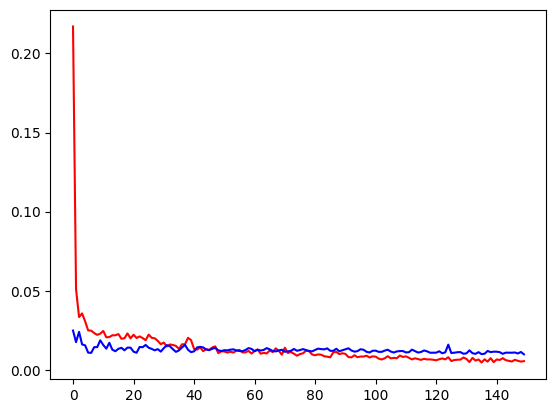

In [ ]:
plt.plot(lstm.history.history['loss'],color='red',label='train')
plt.plot(lstm.history.history['val_loss'],color='blue',label='train')

In [ ]:
gru.fit(X_train, Y_train, validation_data= (X_val,Y_val), epochs=150, batch_size=32)

Epoch 1/150
6/6 [==============================] - 14s 560ms/step - loss: 0.1845 - val_loss: 0.0300
Epoch 2/150
6/6 [==============================] - 0s 80ms/step - loss: 0.0426 - val_loss: 0.0155
Epoch 3/150
6/6 [==============================] - 0s 82ms/step - loss: 0.0272 - val_loss: 0.0238
Epoch 4/150
6/6 [==============================] - 0s 82ms/step - loss: 0.0241 - val_loss: 0.0127
Epoch 5/150
6/6 [==============================] - 0s 84ms/step - loss: 0.0206 - val_loss: 0.0182
Epoch 6/150
6/6 [==============================] - 1s 90ms/step - loss: 0.0179 - val_loss: 0.0103
Epoch 7/150
6/6 [==============================] - 0s 82ms/step - loss: 0.0155 - val_loss: 0.0106
Epoch 8/150
6/6 [==============================] - 1s 87ms/step - loss: 0.0125 - val_loss: 0.0149
Epoch 9/150
6/6 [==============================] - 0s 83ms/step - loss: 0.0145 - val_loss: 0.0117
Epoch 10/150
6/6 [==============================] - 1s 145ms/step - loss: 0.0110 - val_loss: 0.0166
Epoch 11/150
6/6

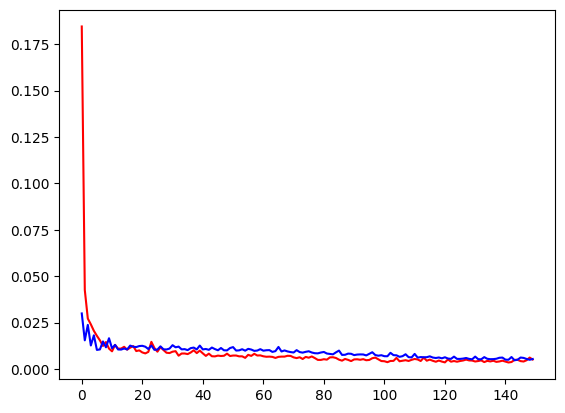

In [ ]:
plt.plot(gru.history.history['loss'],color='red',label='train')
plt.plot(gru.history.history['val_loss'],color='blue',label='train')

In [ ]:
gru_pred = gru.predict(X_test)

2/2 [==============================] - 2s 18ms/step


In [ ]:
lstm_pred = lstm.predict(X_test)

2/2 [==============================] - 3s 21ms/step


In [ ]:
gru_pred[0],lstm_pred[0],Y_test[0]

(array([0.42237175], dtype=float32),
 array([0.2547924], dtype=float32),
 0.4646604086140256)

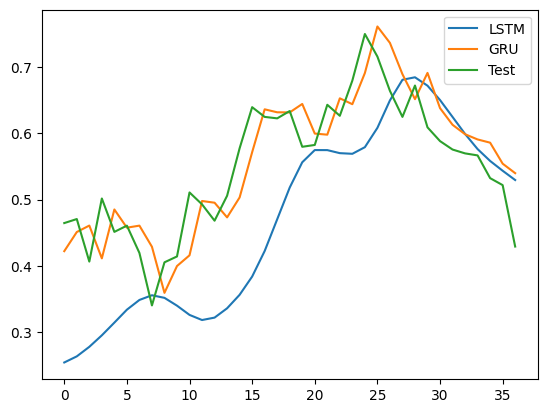

In [ ]:
plt.plot(lstm_pred, label='LSTM')
plt.plot(gru_pred, label='GRU')
plt.plot(Y_test,label="Test")
plt.legend()
plt.show()

In [ ]:
lstm_pred = np.array(lstm_pred)
gru_pred = np.array(gru_pred)

In [ ]:
alpha = 0.8
hybrid_pred = alpha * lstm_pred + (1 - alpha) * gru_pred

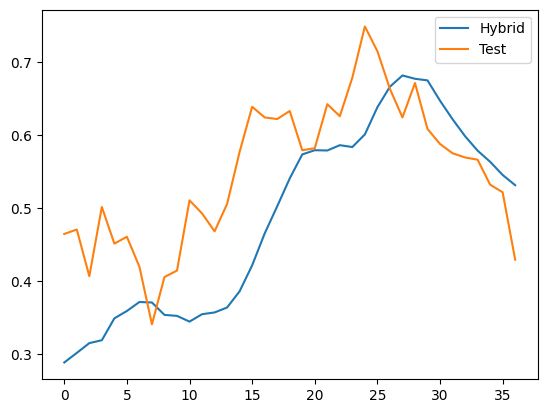

In [ ]:
plt.plot(hybrid_pred,label="Hybrid")
plt.plot(Y_test,label="Test")
plt.legend()
plt.show()

In [ ]:
hybrid_pred_real = scaler.inverse_transform(hybrid_pred)
y_real = scaler.inverse_transform(Y_test.reshape(-1,1))
hybrid_pred_real,y_real

(array([[869.4126 ],
        [871.7888 ],
        [874.22455],
        [874.9412 ],
        [880.3805 ],
        [882.2075 ],
        [884.44226],
        [884.3146 ],
        [881.2363 ],
        [880.9931 ],
        [879.5649 ],
        [881.40717],
        [881.8421 ],
        [883.07263],
        [887.1066 ],
        [893.54724],
        [901.4617 ],
        [908.2214 ],
        [915.1355 ],
        [921.1083 ],
        [922.1536 ],
        [922.08563],
        [923.4041 ],
        [922.94385],
        [926.08484],
        [932.83575],
        [937.9318 ],
        [940.7243 ],
        [939.9062 ],
        [939.5064 ],
        [934.45447],
        [929.8593 ],
        [925.63336],
        [922.04834],
        [919.2849 ],
        [916.00415],
        [913.46094]], dtype=float32),
 array([[901.35],
        [902.45],
        [890.85],
        [908.05],
        [898.95],
        [900.65],
        [893.2 ],
        [878.9 ],
        [890.65],
        [892.25],
        [909.7 ],
        

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_real, hybrid_pred_real)
mae

15.787205711570943

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_real, hybrid_pred_real)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 15.787205711570943
MSE: 366.03102383820584
RMSE: 19.131937273527893


In [ ]:
lstm_pred = scaler.inverse_transform(lstm_pred)
mae1 = mean_absolute_error(y_real, lstm_pred)
mse1 = mean_squared_error(y_real, lstm_pred)
rmse1 = np.sqrt(mse1)
print(f"MAE: {mae1}")
print(f"MSE: {mse1}")
print(f"RMSE: {rmse1}")

MAE: 18.757752454603036
MSE: 519.3948451889283
RMSE: 22.79023574228508


In [ ]:
gru_pred = scaler.inverse_transform(gru_pred)
mae1 = mean_absolute_error(y_real, gru_pred)
mse1 = mean_squared_error(y_real, gru_pred)
rmse1 = np.sqrt(mse1)
print(f"MAE: {mae1}")
print(f"MSE: {mse1}")
print(f"RMSE: {rmse1}")

MAE: 7.948791173986481
MSE: 87.78682187958324
RMSE: 9.369462197991048


In [ ]:
lstm_pred_train = lstm.predict(X_train)
gru_pred_train = gru.predict(X_train)


6/6 [==============================] - 0s 20ms/step


In [ ]:
lstm_pred_val = lstm.predict(X_val)
gru_pred_val = gru.predict(X_val)

1/1 [==============================] - 0s 34ms/step


In [ ]:
hybrid_prediction_train = alpha * lstm_pred_train + (1 - alpha) * gru_pred_train
hybrid_prediction_train = scaler.inverse_transform(hybrid_prediction_train)

In [ ]:
hybrid_prediction_val = alpha * lstm_pred_val + (1 - alpha) * gru_pred_val
hybrid_prediction_val = scaler.inverse_transform(hybrid_prediction_val)

In [ ]:
hybrid_prediction_val

array([[860.27344],
       [859.5055 ],
       [857.6695 ],
       [854.56396],
       [852.00806],
       [849.31256],
       [853.10614],
       [856.2965 ],
       [857.7699 ],
       [858.994  ],
       [860.3513 ],
       [862.82245],
       [863.875  ],
       [864.6013 ],
       [866.0169 ],
       [864.15924],
       [864.26514],
       [863.1652 ],
       [864.2899 ],
       [863.80634],
       [865.2396 ]], dtype=float32)

In [ ]:
hybrid_prediction_train_flatten = hybrid_prediction_train.flatten()
preds_train = pd.Series(hybrid_prediction_train_flatten,index=train_index[16:])

NameError: ignored

In [ ]:
y_plot = df[target]
y_plot = y_plot[timestamp:]


In [ ]:
indexes = y_plot.index

In [ ]:
indexes

In [ ]:
hybrid_pred_test = hybrid_pred_real.flatten()

In [ ]:
hybrid_prediction_train = hybrid_prediction_train.flatten()
hybrid_prediction_val = hybrid_prediction_val.flatten()

In [ ]:
value = np.concatenate((hybrid_prediction_train,hybrid_prediction_val))
value = np.concatenate((value,hybrid_pred_test))

In [ ]:
value_df = pd.DataFrame(value,index = indexes,columns=["Close"])


In [ ]:
y_df = pd.DataFrame(y_plot)
y_df

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(value_df, label='Predicted Price')
plt.scatter(y_df.index,y_df['close '],label='Real Price')
#plt.plot(preds_test[target],label='Prediction_test')
plt.legend()
plt.show()

In [ ]:
new_df = df.reset_index()
new_df = new_df[["Date ","close "]]
new_df = new_df.rename(columns = {"Date ":"ds","close ":"y"})
new_df.head()

In [ ]:
import datetime
new_df['ds'] = new_df['ds'].apply(lambda x: datetime.datetime.strptime(x, '%d-%b-%Y').strftime('%Y-%m-%d'))

In [ ]:
from prophet import Prophet
fbp = Prophet(daily_seasonality = True)
fbp.fit(new_df)
fut = fbp.make_future_dataframe(periods=2)
forecast = fbp.predict(fut)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(fbp, forecast)